# Netflix EDA for movies and tv shows in last few years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
df = pd.read_csv('./data/netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Explore Data

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum() ## checking for null

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.type.unique()  ## Only 2 type of series 

array(['Movie', 'TV Show'], dtype=object)

In [7]:
df.director.count() ## non null 

6173

In [8]:
df.director.nunique()

4528

In [9]:
df.director.notnull().sum()

6173

In [10]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## Cleaning and taking insights from data

### Change the date added to datetime and then only year value

In [11]:
df['date_added'] = pd.DatetimeIndex(df['date_added']).year
df.rename(columns = {'date_added':'listing_year'}, inplace = True)

### Filter movies and tv show by their type and store in to new col for taking count latter

In [12]:
movies_show_id = df[df.type == 'Movie'].show_id
tv_shows_id = df[df.type == 'TV Show'].show_id


In [13]:
df['movies']= movies_show_id
df['tv_shows'] = tv_shows_id
# df[['movies', 'tv_shows']] = df[['movies', 'tv_shows']].fillna(0)
df

,show_id,type,title,director,cast,country,listing_year,release_year,rating,duration,listed_in,description,movies,tv_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021.0,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",s1,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,s2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021.0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,s3
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021.0,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,s4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,s5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019.0,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",s8803,NaN
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019.0,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,s8804
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019.0,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,s8805,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020.0,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",s8806,NaN


In [14]:
df = df.drop(columns=['release_year'])

### Forming group with date added and take their unique values of movies and tv shows

In [15]:
dk = df.groupby('listing_year').nunique()

In [16]:
dk = dk[['movies', 'tv_shows']]
dk

,movies,tv_shows
listing_year,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,5
2014.0,19,5
2015.0,56,26
2016.0,253,176


In [17]:
dk.index

Float64Index([2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0],
             dtype='float64', name='listing_year')

#### ANSWER 2

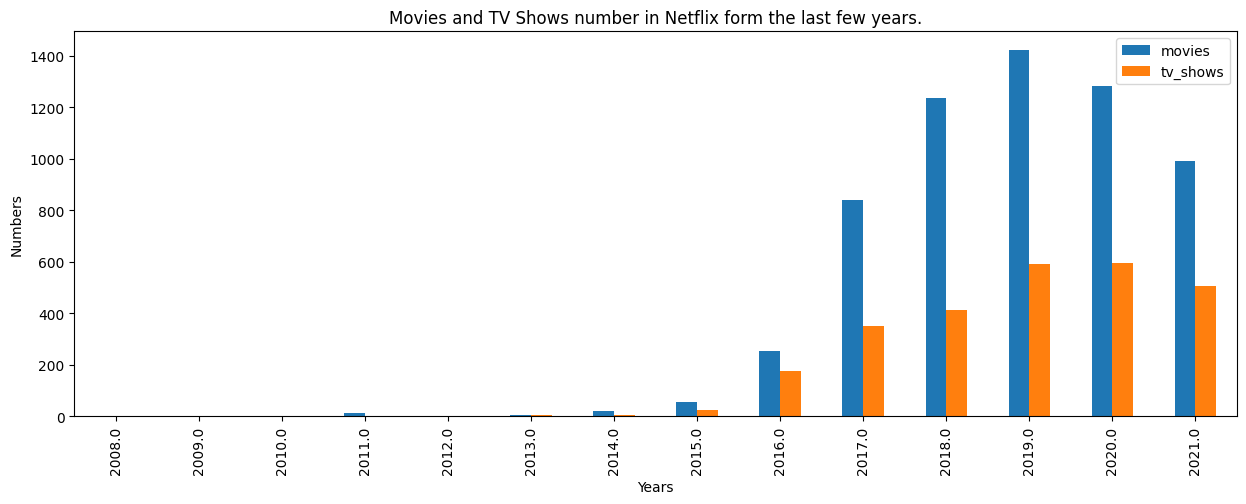

In [18]:
dk.plot(kind='bar',figsize=(15,5), title="Movies and TV Shows number in Netflix form the last few years.",
       xlabel='Years', ylabel='Numbers'
       );

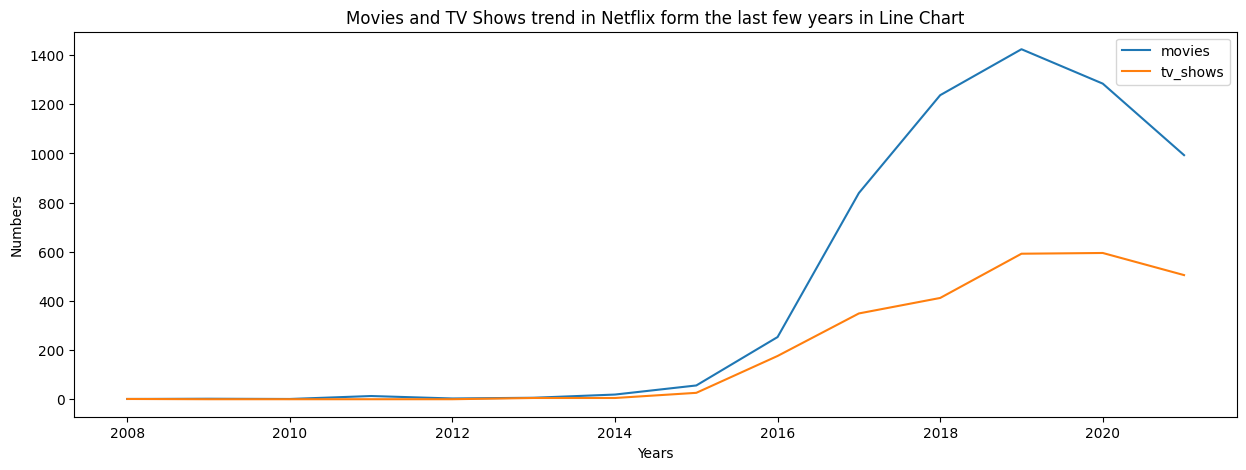

In [19]:
dk.plot(figsize=(15,5), title="Movies and TV Shows trend in Netflix form the last few years in Line Chart",
       xlabel='Years', ylabel='Numbers');

### Forming group with countries and take their unique values of movies and tv shows


In [20]:
df.head(3)

,show_id,type,title,director,cast,country,listing_year,rating,duration,listed_in,description,movies,tv_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",s1,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,s2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,s3


#### Two data set one with movies and country and other is tv shows and country

In [21]:
dcm = pd.DataFrame()
dct = pd.DataFrame()
dcm['movies'] = df.groupby('country').movies.nunique().sort_values(ascending=False)
dct['tv_shows'] = df.groupby('country').tv_shows.nunique().sort_values(ascending=False)
dcm = dcm[:5]
dct = dct[:5]
dct,dcm

(                tv_shows
 country                 
 United States        760
 United Kingdom       213
 Japan                169
 South Korea          158
 India                 79,
                 movies
 country               
 United States     2058
 India              893
 United Kingdom     206
 Canada             122
 Spain               97)

#### ANSWER 1

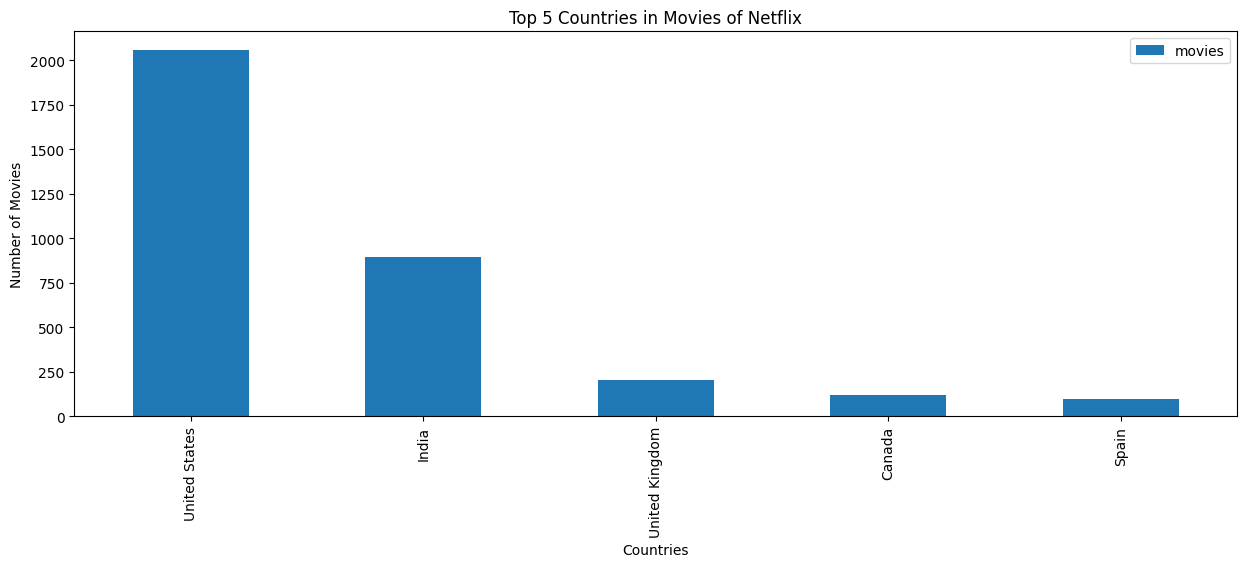

In [22]:
dcm.plot(kind='bar', title='Top 5 Countries in Movies of Netflix', xlabel='Countries', ylabel='Number of Movies', figsize=(15,5));

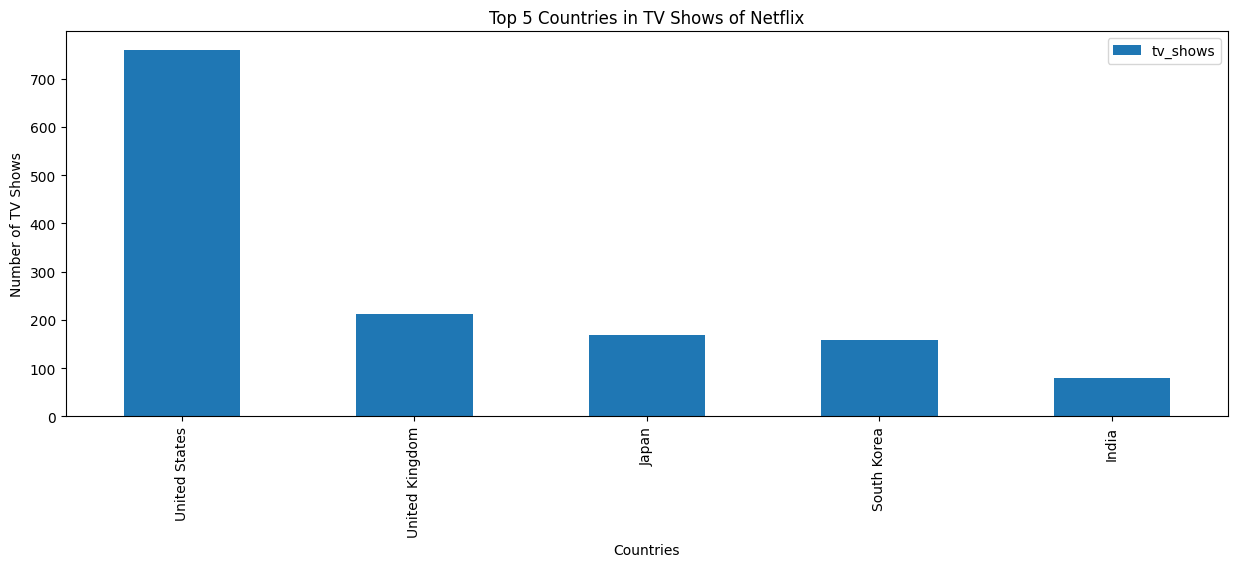

In [23]:
dct.plot(kind='bar', title='Top 5 Countries in TV Shows of Netflix', xlabel='Countries', ylabel='Number of TV Shows', figsize=(15,5));

## Goal 

1. add listing_year col
2. movies and tvshow wrt year 
3. focus on country and director also

## Questions

1. Top country for releasing movie/tv show ?
2. Year where highest movie/tv show released ?
3. Director who direct highest number of movies or tv show ?
4. Percentage of movies vs tv shows?
5. Which month netflix add more content?
6. Most working actor/actress ?